In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import pyphen
import textwrap

%matplotlib inline

## Gutenberg Datensatz

In [2]:
stats = pd.read_csv('data/processed/stats.csv')
chapters = pd.read_csv('data/processed/chapters.csv')
dictionary = pd.read_csv('data/processed/dictionary_cut.csv')
ambiguous_tokens = pd.read_csv('data/processed/ambiguous_tokens.csv')

In [3]:
stats.head()

,author,title,genre,token_count,sentence_count,avg_sentence_length,avg_syllables
0,"Ranke, Leopold von",Vom Einfluß der Theorie,Geschichte,869,39,22.282051,1.853855
1,"Ranke, Leopold von",Über die Verwandtschaft und den Unterschied de...,Geschichte,2025,68,29.779412,1.810864
2,"Ranke, Leopold von",Über die Epochen der neueren Geschichte,Geschichte,1542,49,31.469388,1.869650
3,"Ranke, Leopold von",Politisches Gespräch,Geschichte,12,2,6.000000,1.166667
4,"Ranke, Leopold von",Geschichte und Philosophie,Geschichte,439,14,31.357143,1.874715


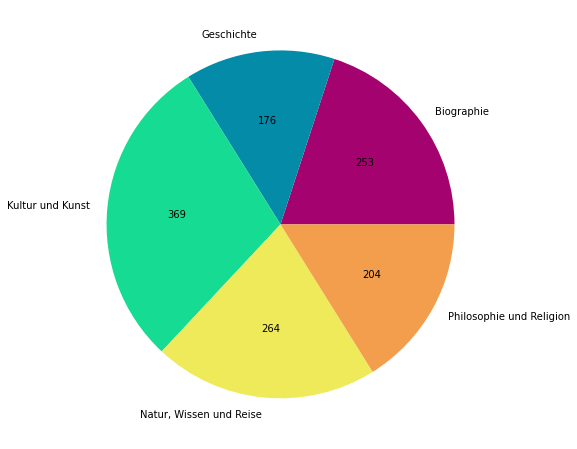

In [4]:
colors = {'Geschichte':'#A4036F', 'Kultur und Kunst':'#048BA8', 'Biographie':'#16DB93', 'Natur, Wissen und Reise':'#EFEA5A', 'Philosophie und Religion':'#F29E4C'}

stats[['genre', 'title']].groupby('genre').size().plot.pie(figsize=(14, 8), colors=stats['genre'].apply(lambda x: colors[x]).drop_duplicates(), autopct=(lambda p: '{:.0f}'.format(p * len(stats) / 100)), ylabel="")
plt.show()

## 2 - Statistiken

* Größe des Lexikons: 
 * 186.355 Token
* Größe des Lexikons (nur Nomen, Verben und Adjektive):
 * 175.904 Token
* Größe des Lexikons nach Lemmatisierung (nur Nomen, Verben und Adjektive):
 * 118.417 Token
---
* Durchschnittliche Länge eines Dokuments (in Token)
 * ~ 2650 Wörter
* Durchschnittliche Länge eines Satzes? 
 * ~ 28.5 Wörter


## 3 - Worthäufigkeiten

In [5]:
complete = dictionary[['ta_token', 'ta_counter']].groupby('ta_token', as_index=False).sum()
noun = dictionary[dictionary.ta_type == 'noun'][['ta_token', 'ta_counter']].groupby('ta_token', as_index=False).sum()

doc_stats = stats[['author', 'genre']].join(dictionary.set_index('document_id'), on=stats.index, how='inner').drop('key_0', axis=1)
history = doc_stats[doc_stats.genre == 'Geschichte'][['ta_token', 'ta_counter']].groupby('ta_token', as_index=False).sum()
religion = doc_stats[doc_stats.genre == 'Philosophie und Religion'][['ta_token', 'ta_counter']].groupby('ta_token', as_index=False).sum()

In [25]:
complete.sort_values(by='ta_counter', ascending=False).reset_index(drop=True).head(40)

,ta_token,ta_counter
0,Zeit,4661
1,Menschen,3954
2,Leben,3340
3,Welt,2989
4,großen,2417
5,Mann,2324
6,machen,2311
7,Jahre,2279
8,ersten,2107
9,andere,2085


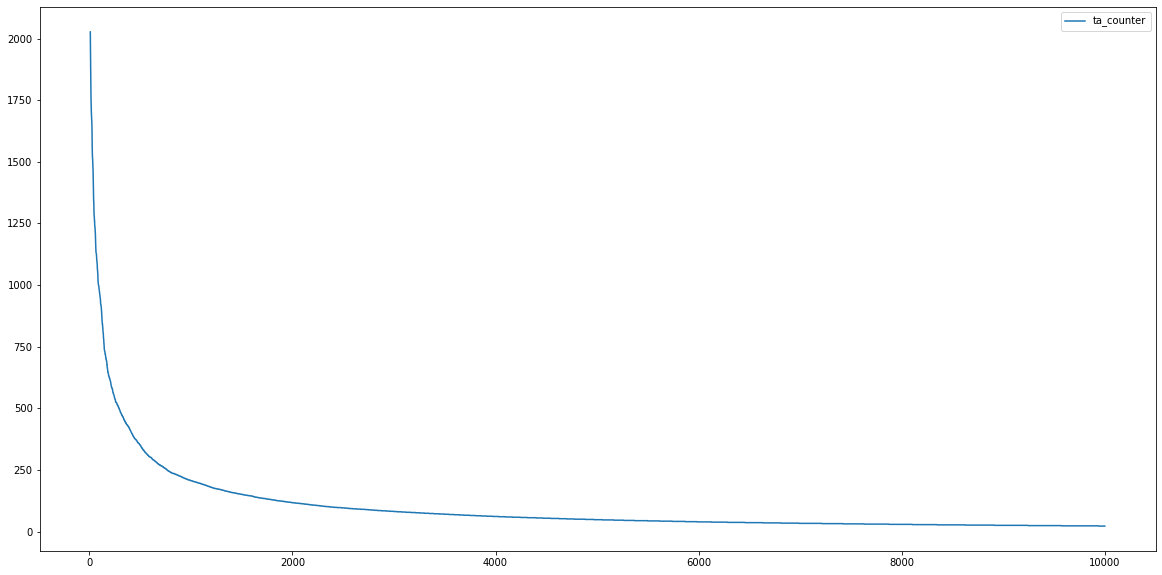

In [30]:
complete_2 = complete[complete.ta_counter > 1]
complete_2 = complete_2.sort_values(by='ta_counter', ascending=False).reset_index(drop=True)
complete_2.iloc[10:10000].plot(figsize=(20,10))
plt.show()

### Statistiken über alle relevanten Wortarten des Lexikons (Nomen, Verben, Adjektive) 

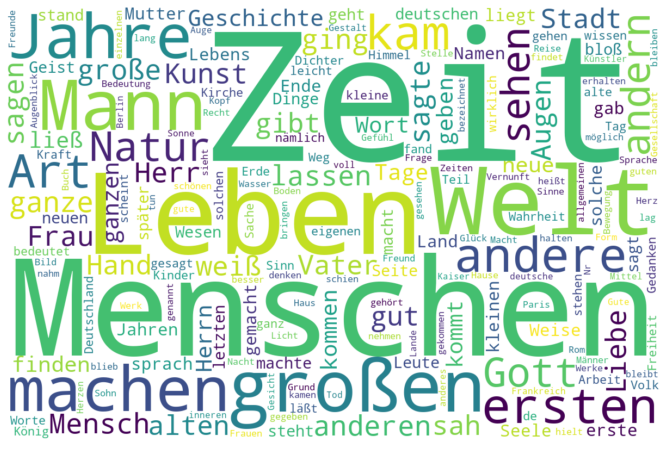

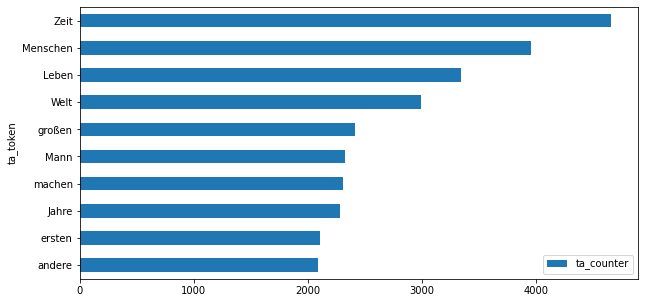

In [6]:
data = dict(zip(complete['ta_token'].tolist(), complete['ta_counter'].tolist()))

wordcloud = WordCloud(background_color="white", width=1200, height=800, min_font_size=10, collocations=False).generate_from_frequencies(data)
# Display the generated image:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

complete.sort_values(by='ta_counter', ascending=False).head(10).plot.barh(x='ta_token', y='ta_counter', figsize=(10,5)).invert_yaxis()
plt.show()

### Statistiken über alle Nomen des Lexikons

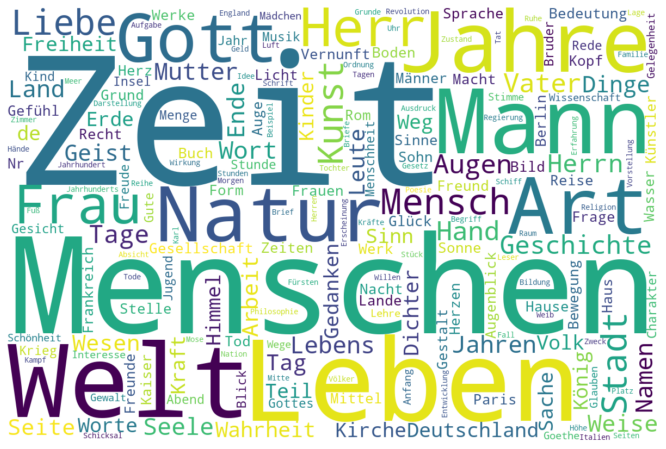

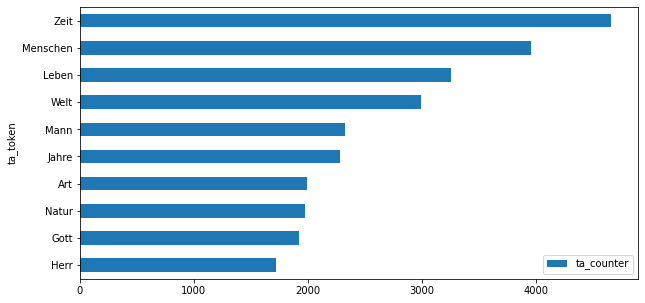

In [7]:
data = dict(zip(noun['ta_token'].tolist(), noun['ta_counter'].tolist()))

wordcloud = WordCloud(background_color="white", width=1200, height=800, min_font_size=10, collocations=False).generate_from_frequencies(data)
# Display the generated image:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

noun.sort_values(by='ta_counter', ascending=False).head(10).plot.barh(x='ta_token', y='ta_counter', figsize=(10,5)).invert_yaxis()
plt.show()

### Statistiken über Worthäufigkeiten der Genres 'Geschichte' und 'Philosophie und Religion'

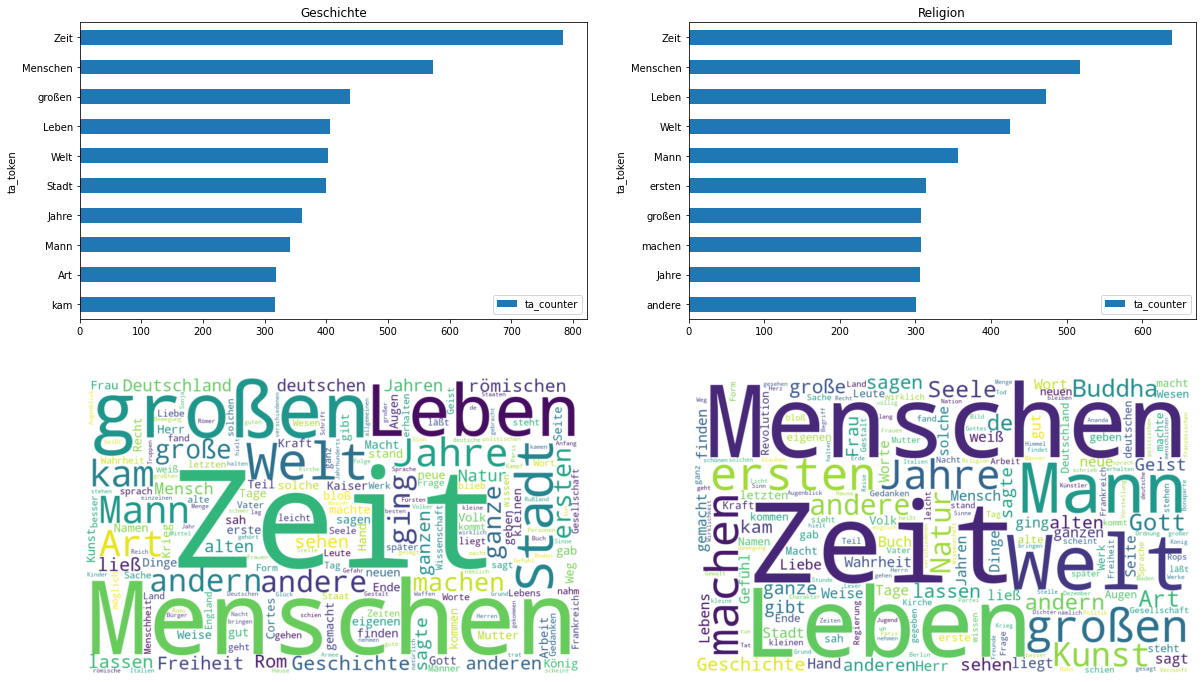

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(w=20, h=12)

history.sort_values(by='ta_counter', ascending=False).head(10).plot.barh(ax=axes[0,0], x='ta_token', y='ta_counter')
axes[0,0].set_title("Geschichte")
axes[0,0].invert_yaxis()

data = dict(zip(history['ta_token'].tolist(), history['ta_counter'].tolist()))
wordcloud = WordCloud(background_color="white", width=1000, height=600, min_font_size=10, collocations=False).generate_from_frequencies(data)
axes[1,0].imshow(wordcloud, interpolation='bilinear')
axes[1,0].axis("off")
axes[1,0].margins(x=0, y=0)

religion.sort_values(by='ta_counter', ascending=False).head(10).plot.barh(ax=axes[0,1], x='ta_token', y='ta_counter')
axes[0,1].set_title("Religion")
axes[0,1].invert_yaxis()

data = dict(zip(religion['ta_token'].tolist(), religion['ta_counter'].tolist()))
wordcloud = WordCloud(background_color="white", width=1000, height=600, min_font_size=10, collocations=False).generate_from_frequencies(data)
axes[1,1].imshow(wordcloud, interpolation='bilinear')
axes[1,1].axis("off")
axes[1,1].margins(x=0, y=0)

## 4 - Wörter mit mehrdeutigen POS Tags

### Die 30 häufigsten Wörter innerhalb eines Dokuments mit mehrdeutigen POS Tags

In [9]:
ambiguous_tokens_doc = stats[['title']].join(ambiguous_tokens.set_index('document_id'), on=stats.index, how='inner').drop('key_0', axis=1)

ambiguous_tokens_doc[ambiguous_tokens_doc.ta_normalized.isin(['einen', 'eine', 'ein', 'sein'])].sort_values(by='length', ascending=False)[['ta_normalized', 'ta_type', 'title']].head(10)

,ta_normalized,ta_type,title
157,einen,"['adjective', 'determiner', 'noun', 'verb', 'p...",Dem Nordpol am nächsten
10,eine,"['adjective', 'verb', 'determiner', 'pronoun']","Römische Geschichte, Buch 4"
864,eine,"['determiner', 'pronoun', 'verb', 'adjective']",Preußentum und Sozialismus
568,einen,"['noun', 'determiner', 'adjective', 'pronoun']",Über das Erhabene
616,eine,"['determiner', 'pronoun', 'adjective', 'verb']",Culturstudien
655,eine,"['adjective', 'determiner', 'verb', 'pronoun']",Der Unfug des Lebens
678,einen,"['pronoun', 'determiner', 'adjective', 'noun']",Michelangelo
694,eine,"['determiner', 'pronoun', 'verb', 'adjective']",Aus der bösen alten Zeit
744,eine,"['determiner', 'pronoun', 'verb', 'adjective']",Brüssel
810,eine,"['determiner', 'pronoun', 'adjective', 'verb']",Die Erziehung des Menschengeschlechts


In [10]:
ambiguous_tokens_doc[~ambiguous_tokens_doc.ta_normalized.isin(['einen', 'eine', 'ein', 'sein'])].sort_values(by='length', ascending=False)[['ta_normalized', 'ta_type', 'title']].head(20)

,ta_normalized,ta_type,title
804,meine,"['determiner', 'adjective', 'verb', 'pronoun']",Laokoon
810,da,"['adverb', 'conjunction', 'noun', 'adjective']",Die Erziehung des Menschengeschlechts
163,da,"['particle', 'conjunction', 'adverb', 'noun']",Die Deutschen Expeditionen und ihre Ergebnisse...
389,meinen,"['noun', 'determiner', 'verb', 'pronoun']",Der philosophierende Vagabund
929,sich,"['pronoun', 'noun', 'adjective', 'adverb']",Im Lager der Armut
929,um,"['conjunction', 'preposition', 'particle', 'ad...",Im Lager der Armut
822,meinen,"['verb', 'pronoun', 'determiner', 'adjective']",Selma Lagerlöf
822,um,"['conjunction', 'preposition', 'noun', 'partic...",Selma Lagerlöf
822,wert,"['noun', 'verb', 'adjective', 'particle']",Selma Lagerlöf
1161,da,"['adverb', 'conjunction', 'particle']",Neues vollständiges und allgemeines Waaren- un...


## 5 - Eigene Statistiken

### Autoren mit der längsten bzw. kürzesten durchschnittlichen Satzlänge

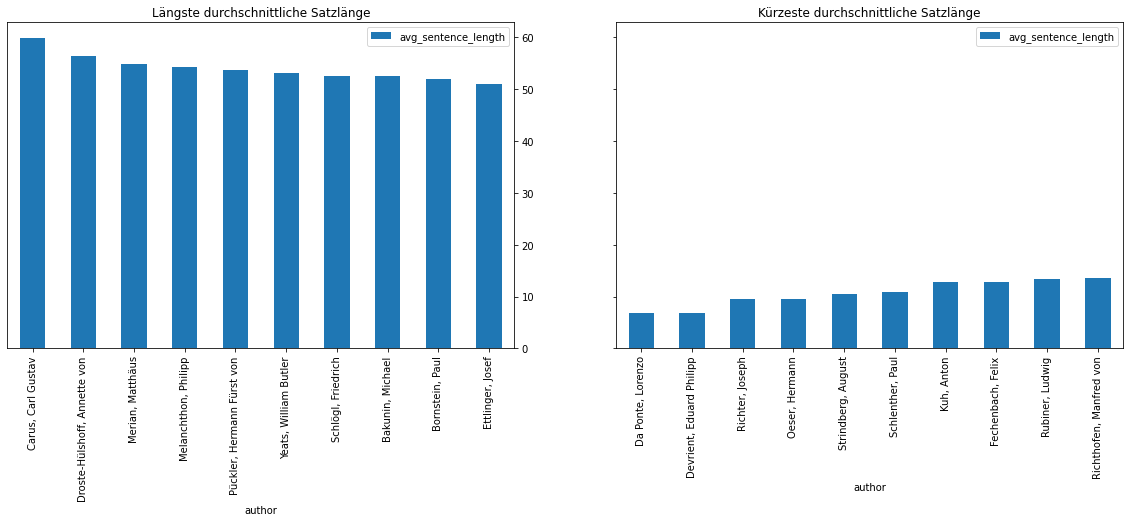

In [11]:
author_avg_s = stats[['author', 'avg_sentence_length']].groupby('author', as_index=False).avg_sentence_length.mean()

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.set_size_inches(w=20, h=6)

author_avg_s.sort_values(by='avg_sentence_length', ascending=False).head(10).plot.bar(ax=axes[0], x='author', y='avg_sentence_length')
axes[0].set_title("Längste durchschnittliche Satzlänge")
axes[0].yaxis.tick_right()

author_avg_s.sort_values(by='avg_sentence_length').head(10).plot.bar(ax=axes[1], x='author', y='avg_sentence_length')
axes[1].set_title("Kürzeste durchschnittliche Satzlänge")

plt.show()

### Ist eine Bildung von Clustern auf Basis der Textlänge erkennbar?

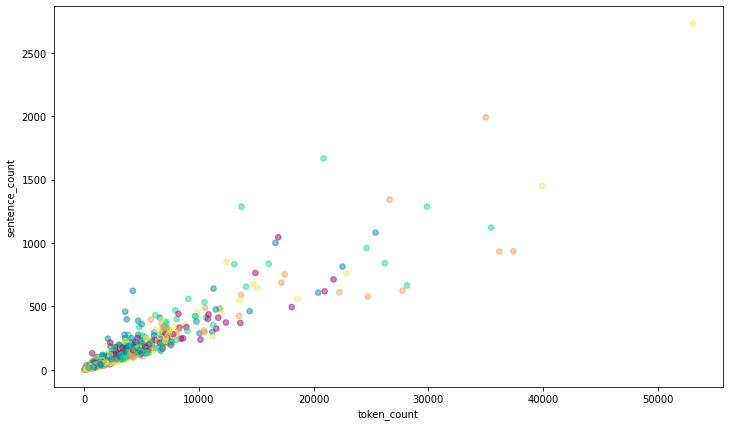

In [12]:
stats.plot.scatter(x='token_count', y='sentence_count', c=stats['genre'].apply(lambda x: colors[x]), figsize=(12,7), s=32, alpha=0.5)
plt.show()

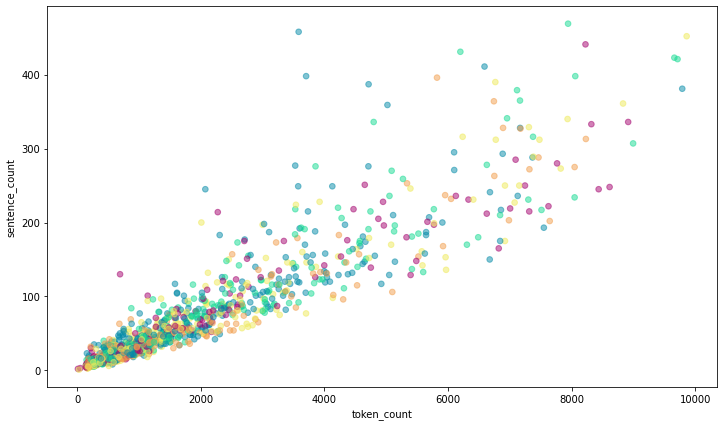

In [13]:
stats[(stats.token_count <= 10000) & (stats.sentence_count <= 500)].plot.scatter(x='token_count', y='sentence_count', c=stats[(stats.token_count <= 10000) & (stats.sentence_count <= 500)]['genre'].apply(lambda x: colors[x]), figsize=(12,7), s=32, alpha=0.5)
plt.show()

### Lesbarkeitsindex

Flesch-Reading-Ease: numerischer Wert für die Lesbarkeit eines Textes

`180 - ASL - 58,5 * ASW (avg words/sentence, avg syllables/word)`


```
Score   Lesbarkeit 	    Verständlich für
----------------------------------------------
0–30 	  Sehr schwer 	Akademiker
30–50 	 Schwer 	
50–60 	 Mittelschwer 	
60–70 	 Mittel 	     13–15-jährige Schüler
70–80 	 Mittelleicht 	
80–90 	 Leicht 	
90–100 	Sehr leicht 	11-jährige Schüler 
```



In [14]:
stats['fre'] = 180 - stats['avg_sentence_length'] - 58.5 * stats['avg_syllables']
stats[['author', 'title', 'genre', 'avg_sentence_length', 'avg_syllables', 'fre']].sort_values(by='fre').head(10)

,author,title,genre,avg_sentence_length,avg_syllables,fre
1146,"Carus, Carl Gustav",Geheimnisvoll am lichten Tag,"Natur, Wissen und Reise",85.166667,1.812484,-11.196979
166,"Carus, Carl Gustav",Goethe zu dessen näherem Verständnis,Kultur und Kunst,71.375000,1.870968,-0.826613
592,"Simmel, Georg",Über die Grundfrage des Pessimismus in methodi...,Philosophie und Religion,52.818182,2.130781,2.531100
1098,"Hegel, Georg Wilhelm Friedrich",Wissenschaft der Logik. Erster Teil,Philosophie und Religion,44.843750,2.171717,8.110795
1145,"Carus, Carl Gustav",Gelegentliche Betrachtungen über den Charakter...,"Natur, Wissen und Reise",63.166667,1.827556,9.921333
1064,"Goethe, Johann Wolfgang von",Naturwissenschaftliche Schriften 1792 - 1797,"Natur, Wissen und Reise",56.333333,1.938204,10.281749
363,"Swedenborg, Emanuel von",Über das Erste Buch Mose. 20. Kapitel bis 29. ...,Philosophie und Religion,44.495192,2.120690,11.444463
339,"Kessler, Harry Graf",Notizen über Mexico,"Natur, Wissen und Reise",47.800000,2.058824,11.758824
460,Jakob Sprenger - Heinrich Kramer (Institoris),Der Hexenhammer. Dritter Teil,Philosophie und Religion,57.800000,1.861490,13.302833
183,"Yeats, William Butler",Erzählungen und Essays,Kultur und Kunst,53.095238,1.934146,13.757201


In [15]:
print(textwrap.fill(chapters.iloc[166].chapter[0:1000] + '...', width=100))

Der Peary Arctic Club beschloß in seiner letzten Sitzung einstimmig, die »Roosevelt« zur
Ausbesserung in ein Trockendock zu bringen und sie dann Commander Peary für einen neuen Versuch, den
Nordpol zu erreichen, zur Verfügung zu stellen. Der Klub hatte diesen Beschluß gefaßt, weil er
glaubt, daß Commander Peary Erfolg haben wird, er hat volles Vertrauen zu dem tapferen und
unerschrockenen Amerikaner und teilt den Stolz, der jeden Amerikaner erfüllen muß, wenn er die
amerikanische Flagge auf dem Nordpol aufgepflanzt sieht. Der Peary Arctic Club bittet alle die, die
bisher beigesteuert haben, wie alle, die sich für dieses patriotische Unternehmen interessieren, um
ihre Beihilfe. Die Kosten dieser letzten Expedition werden schätzungsweise hunderttausend Dollar
betragen. Neuyork, 30. März 1907.  Die in Herrn Jesups Brief erwähnte Tatsache, daß der Peary Arctic
Club die Entsendung einer neuen Polarexpedition für den kommenden Sommer beschlossen hat, mag als
Entschuldigung für manche Kürzen 

In [16]:
stats[['author', 'title', 'genre', 'avg_sentence_length', 'avg_syllables', 'fre']].sort_values(by='fre', ascending=False).head(10)

,author,title,genre,avg_sentence_length,avg_syllables,fre
3,"Ranke, Leopold von",Politisches Gespräch,Geschichte,6.000000,1.166667,105.750000
27,"Wagner, Richard",Siegfried,Kultur und Kunst,7.800000,1.293040,96.557143
40,"Wagner, Richard",Die Walküre,Kultur und Kunst,11.294118,1.322917,91.315257
17,"Wilde, Oscar",Salome,Kultur und Kunst,7.825328,1.477679,85.730476
31,"Wagner, Richard",Götterdämmerung,Kultur und Kunst,10.588235,1.433333,85.561765
59,"Braun, Lily",Madeleine Guimard,Kultur und Kunst,8.465306,1.478558,85.039053
62,"Berlioz, Hector",Lebenserinnerungen,Kultur und Kunst,20.909091,1.373832,78.721750
299,Klabund,Borgia,Biographie,14.363636,1.487939,78.591912
389,"Clefeld, Ernst",Der philosophierende Vagabund,Biographie,13.967742,1.541866,75.833082
61,"Devrient, Eduard Philipp",Hans Heiling,Kultur und Kunst,6.826087,1.664407,75.806116


In [17]:
print(textwrap.fill(chapters.iloc[27].chapter[0:1000] + '...', width=100))

Zwangvolle Plage! Müh ohne Zweck! Hoiho! Hoiho! Hau ein! Hau ein! Fort mit dem Tier! Zu zwei komm'
ich, He! Laß das Wild! So fährst du heute noch heil! Wohl leid' ich's gern, erlegst du Bären: Nach
beßrem Gesellen sucht' ich, Ich schuf die Waffe scharf, Was frommt seine helle Schneide, Nun tobst
du wieder wie toll: Braten briet ich mir selbst: Das ist nun der Liebe schlimmer Lohn! Vieles
lehrtest du, Mime, Mein Kind, das lehrt dich kennen, Ich kann dich ja nicht leiden, Des ist deine
Wildheit schuld, Ei, Mime, bist du so witzig, Was ist dir, Tor? Ach, bist du dumm! Das zullende Kind
zogest du auf, Glauben sollst du, was ich dir sage: Das lügst du, garstiger Gauch! Greulichen Unsinn
kramst du da aus! Siehst du, nun fällt auch selbst mir ein, Was Vater! Was Mutter! So muß ich dich
fassen, Ans Leben gehst du mir schier! So starb meine Mutter an mir? Meinem Schutz übergab sie dich:
Mich dünkt, des gedachtest du schon! So hieß mich die Mutter, Nun melde, wie hieß meine Mutter? Das
weiß ich 